# Alura Challenge - Data Science - Week 2

Guilherme Lupinari Volpato
E-mail: lv.gui97@gmail.com
Github: https://github.com/LupiVolpi

You have been hired as a data scientist by the *telecom operator Alura Voz*. In the initial meeting with the people responsible for the company's *sales area*, the importance of reducing the Customer Evasion Rate, known as *Churn Rate*, was explained. Basically, the Churn Rate indicates how much the company lost revenue or customers in a period of time.


### *Week 2 Challenges:*
- Analyse the target variable *churn*
- Visualize the distribution of the *churn* variable
- Create relevant visualizations regarding the *churn* variable
- Analyse the correlation of the variables
- Test different types of graphs.


### *Data index:*
- *customerID:* each customer's unique identification number.
- *Churn:* whether the client has left the company or not.
- *gender:* Male or Female (according to the database).
- *SeniorCitizen:* whether a client is 65 years of age or older.
- *Partner:* whether the client is partnered or not.
- *Dependents:* whether the client has got dependents or not.
- *tenure:* duration (in months) of the client's contract with the company.
- *PhoneService:* whether the client has hired the companie's phone service.
- *MultipleLines:* whether the client has hired more than one phone line.
- *InternetService:* whether the client has hired a provider of internet.
- *OnlineSecurity:* whether the client has hired an additional online security membership.
- *OnlineBackup:* whether the client has hired an additional online backup membership.
- *DeviceProtection:* whether the client has hired an additional device protection membership.
- *TechSupport:* whether the client has hired an additional technical support membership (with decreased waiting time for services).
- *StreamingTV:* whether the client has hired the cable TV service.
- *StreamingMovies:* whether the client has hired a movie streaming membership.
- *Contract:* the type of the client's contract.
- *PaperlessBilling:* whether the client prefers to receive his billings online.
- *PaymentMethod:* the client's prefered method of payment.
- *Charges.Monthly:* the monthly sum of the client's hired services and membreships.
- *Charges.Total:* the total sum of the client's hired services and memberships.

---
# Importing libraries and Setting preferences

In [1]:
import pandas as pd

pd.set_option("display.max_rows", 100) # Pandas will display 100 DataFrame rows at most.
pd.set_option("display.max_columns", None) # Pandas won't collapse DataFrame columns visualization.
pd.set_option("display.max_colwidth", None) # Pandas will display all the information in each column, regardless of how large the values are.

import matplotlib.pyplot as plt
import numpy as np

---
# Importing the treated data from week 1

In [2]:
data_treated = pd.read_json(path_or_buf = "https://raw.githubusercontent.com/LupiVolpi/alura_challenge_data_science/main/datasets/data_treated.json")

data_treated.head(5)

,customer_id,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,services_hired,contract,paperless_billing,payment_method,charges_daily,charges_monthly,charges_total
0,0002-ORFBO,No,Female,No,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,5,One year,Yes,Mailed check,2.19,65.6,593.30
1,0003-MKNFE,No,Male,No,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,4,Month-to-month,No,Mailed check,2.00,59.9,542.40
2,0004-TLHLJ,Yes,Male,No,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,3,Month-to-month,Yes,Electronic check,2.46,73.9,280.85
3,0011-IGKFF,Yes,Male,Yes,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,6,Month-to-month,Yes,Electronic check,3.27,98.0,1237.85
4,0013-EXCHZ,Yes,Female,Yes,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,4,Month-to-month,Yes,Mailed check,2.80,83.9,267.40


#### <font color = "Blue"> 1. Basic information about the database.

Text(0.5, 1.0, 'Customers by gender')

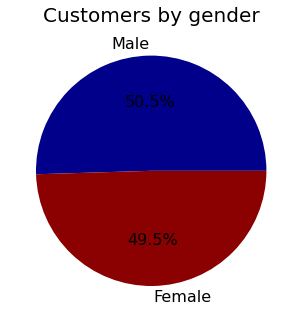

In [3]:
fig = plt.figure(figsize = (5, 4)) # Creating an empty Matplotlib figure
axis = fig.add_axes([0, 0, 1, 1]) # Adding an empty axis onto which the graph will be plotted

labels = data_treated["gender"].value_counts().index # Decided to create a variable to store the labels directly from the sub_set. That way, if the order ever changes (due to a change in percentages) the labels will switch accordingly.

axis.pie(data_treated["gender"].value_counts(normalize = True).round(decimals = 4) * 100, labels = labels, colors = ["darkblue", "darkred"], autopct = "%.1f%%", textprops={'fontsize': 16}) # Plotting a pie chart ("autopct" is the parameter to have the values of each slice appear on the graph; "textprops" allows us to change the font size of the labels of each slice).
axis.set_title("Customers by gender", fontsize = 20, pad = 5) # Setting the text and font size of the title.

### <font color = "Green"> The customer base is almost equally divided between male and female.

Text(0.5, 1.0, '65 years old or more?')

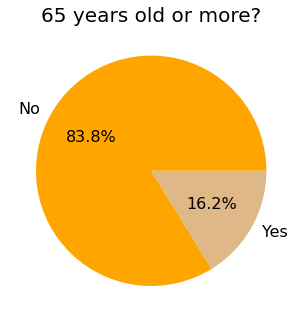

In [4]:
fig = plt.figure(figsize = (5, 4)) # Creating an empty Matplotlib figure
axis = fig.add_axes([0, 0, 1, 1]) # Adding an empty axis onto which the graph will be plotted

labels = data_treated["senior_citizen"].value_counts().index # Creating the index variable

axis.pie(data_treated["senior_citizen"].value_counts(normalize = True) * 100, labels = labels, colors = ["orange", "burlywood"], autopct = "%.1f%%", textprops={'fontsize': 16}) # Plotting the pie chart
axis.set_title("65 years old or more?", fontsize = 20, pad = 5) # Setting the title of the graph

### <font color = "Green"> 83,8% of customers aren't senior citizens.

[Text(0, 0, 'Up to 1 year'),
 Text(1, 0, '1 to 4 years'),
 Text(2, 0, '4+ years')]

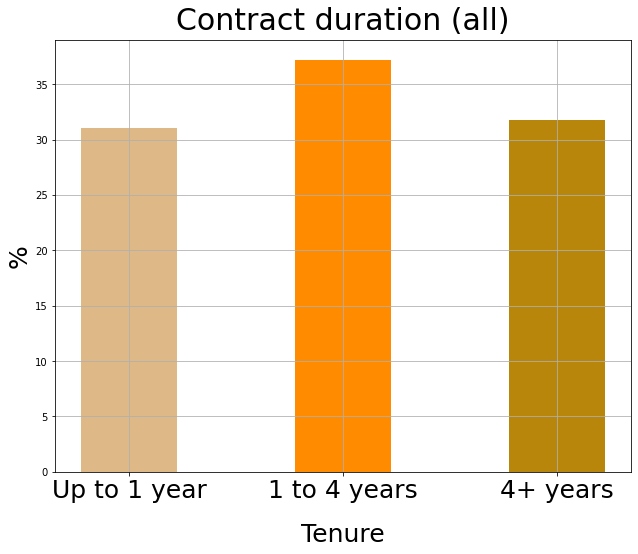

In [49]:
fig = plt.figure(figsize = (8, 6)) # Creating an empty Matplotlib figure
axis = fig.add_axes([0, 0, 1, 1]) # Adding an empty axis onto which the graph will be plotted

all_data_by_tenure = data_treated["tenure"].apply(lambda tenure: "4+ years" if (tenure > 48) else "1 to 4 years" if (48 >= tenure > 12) else "Up to 1 year").value_counts(normalize = True) * 100 # Creating a data subset with the "tenure" column divided into three categories: "Up to 1 year", "1 to 4 years" and "4+ years"
all_data_by_tenure.index = pd.Categorical(values = all_data_by_tenure.index, categories = ["Up to 1 year", "1 to 4 years", "4+ years"], ordered = True) # Normally, the criteria for sorting indexes is alphabetical order. This would not be optimal for visualization, so I changed the index to a categorical pandas object, which will be sorted according to the parameter "categories" specified.
all_data_by_tenure.sort_index(inplace = True) # After the sorting criteria I wanted were specified, I actually sorted the index and altered the original subset by specifying inplace = True

labels = ["Up to 1 year", "1 to 4 years", "4+ years"] # Creating the labels
index = np.arange(len(all_data_by_tenure)) # I created the index for the 'x' axis because a bar chart needs to know how many bars it will actually plot in order to organize it in the axis

axis.grid(True) # Enabling the grid pattern
axis.bar(x = index, height = all_data_by_tenure, width = 0.45, align = "center", color = ["burlywood", "darkorange", "darkgoldenrod"]) # Plotting the bar chart
axis.set_title("Contract duration (all)", fontsize = 30, pad = 10) # Setting the title
axis.set_xlabel("Tenure", fontsize = 25, labelpad = 20) # setting the label for the 'x' axis
axis.set_ylabel("%", fontsize = 25) # Setting the label for the 'y' axis
axis.set_xticks(index) # Setting the amount of values along the 'x' axis
axis.set_xticklabels(labels, fontsize = 25) # Setting the labels for the values along the 'x' axis

In [7]:
# Work in progress

data_treated[["phone_service", "multiple_lines", "online_security", "online_backup", "device_protection", "tech_support", "streaming_tv", "streaming_movies"]].apply(lambda service: service.value_counts(normalize = True) * 100).fillna(value = 0)

,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies
No,9.683374,48.132898,49.666335,43.844952,43.944342,49.311373,39.897771,39.542808
No internet service,0.000000,0.000000,21.666903,21.666903,21.666903,21.666903,21.666903,21.666903
No phone service,0.000000,9.683374,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Yes,90.316626,42.183729,28.666761,34.488144,34.388755,29.021724,38.435326,38.790288


---
# Analysing the *churn* variable

Text(0.5, 1.0, 'Customers that have left the company (Churn)')

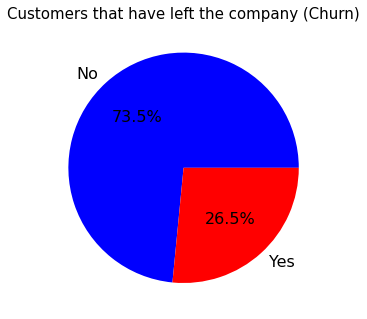

In [8]:
fig = plt.figure(figsize = (5, 4)) # Creating an empty Matplotlib figure
axis = fig.add_axes([0, 0, 1, 1]) # Adding an empty axis onto which the graph will be plotted

labels = data_treated["churn"].value_counts().index # Creating the labels

axis.pie(data_treated["churn"].value_counts(normalize = True).round(decimals = 4) * 100, labels = labels, colors = ["blue", "red"], autopct = "%.1f%%", textprops={'fontsize': 16}) # Plotting the pie chart
axis.set_title("Customers that have left the company (Churn)", fontsize = 15, pad = 5) # Setting the title

### <font color = "Green"> Approximately 26,54% of the customers have left the company.

Text(0.5, 1.0, 'Churn by gender')

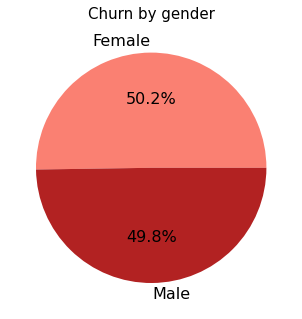

In [9]:
fig = plt.figure(figsize = (5, 4)) # Creating an empty Matplotlib figure
axis = fig.add_axes([0, 0, 1, 1]) # Adding an empty axis onto which the graph will be plotted

labels = data_treated.query("churn == 'Yes'")["gender"].value_counts().index # Creating the labels

axis.pie(data_treated.query("churn == 'Yes'")["gender"].value_counts(normalize = True).round(decimals = 4) * 100, labels = labels, autopct = "%.1f%%", colors = ["salmon", "firebrick"], textprops={'fontsize': 16}) # Plotting the pie chart
axis.set_title("Churn by gender", fontsize = 15, pad = 5)# Setting the title

### <font color = "Green"> Customers who have left the company are almost equally divided between male and female.


[Text(0, 0, 'No'), Text(1, 0, 'Yes'), Text(2, 0, 'Total'), Text(3, 0, 'Max')]

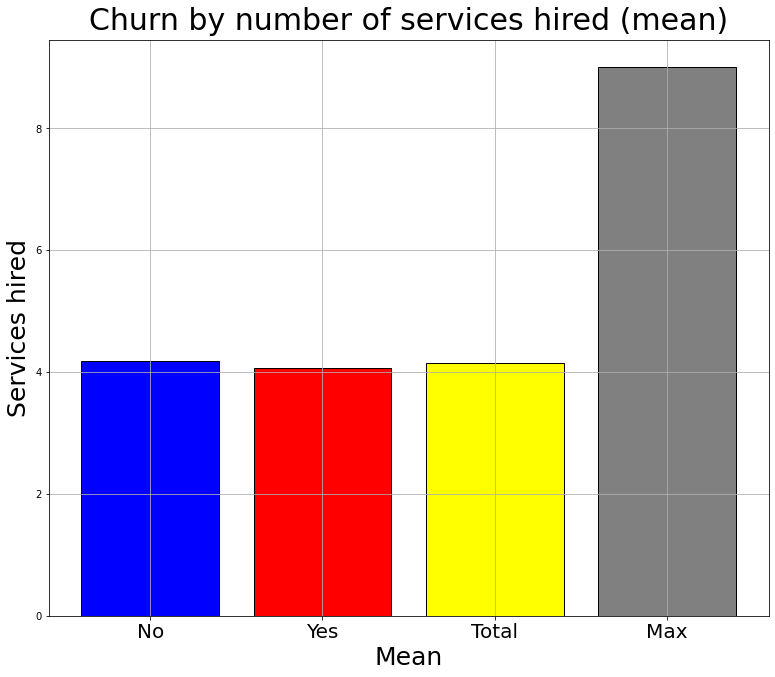

In [10]:
fig = plt.figure(figsize = (10,8)) # Creating an empty Matplotlib figure
axis = fig.add_axes([0, 0, 1, 1]) # Adding an empty axis onto which the graph will be plotted

data = [data_treated.query("churn == 'No'")["services_hired"].mean(), data_treated.query("churn == 'Yes'")["services_hired"].mean(), data_treated["services_hired"].mean(), data_treated["services_hired"].max()] # Creating a list of values from different data subsets: the mean value of services hired only for customers that haven't left the company, the mean value of services hired for customers that have left the company and the highest amount of services hired in the entire dataset.
index = range(len(data)) # Creatng the index for the 'x' axis
xlabels = ["No", "Yes", "Total", "Max"] # Creating the labels for the 'x' axis

axis.grid(True) # Enabling the grid pattern
axis.bar(index, data, color = ["blue", "red", "yellow", "gray"], edgecolor = "black") # Plotting the bar chart
axis.set_title("Churn by number of services hired (mean)", fontsize = 30, pad = 10) # Setting the title
axis.set_xlabel("Mean", fontsize = 25) # Setting the label of the 'x' axis
axis.set_ylabel("Services hired", fontsize = 25) # Setting the label of th 'y' axis

axis.set_xticks(index) # Setting the amount of values along the 'x' axis
axis.set_xticklabels(xlabels, fontsize = 20) # Setting the labels for the values along the 'x' axis

### <font color = "Green"> A customer, on average, hires 4 out of 9 different services from the company, regardless of having left the company or not.

C:\Users\lvgui\anaconda3\lib\site-packages\numpy\lib\stride_tricks.py:536: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  args = [np.array(_m, copy=False, subok=subok) for _m in args]
C:\Users\lvgui\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


[Text(0, 0, 'No'), Text(1, 0, 'Yes'), Text(2, 0, 'Total'), Text(3, 0, 'Max')]

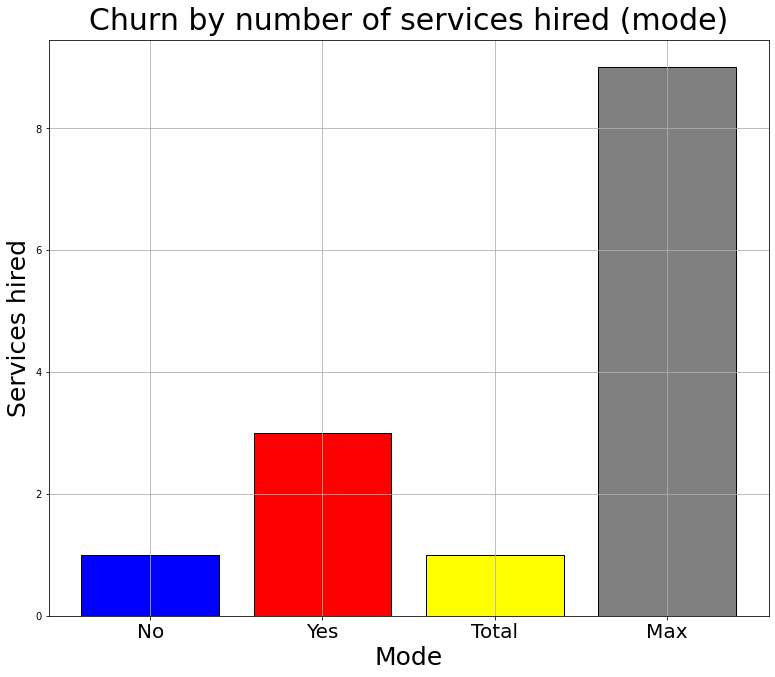

In [11]:
fig = plt.figure(figsize = (10,8)) # Creating an empty Matplotlib figure
axis = fig.add_axes([0, 0, 1, 1]) # Adding an empty axis onto which the graph will be plotted

data = [data_treated.query("churn == 'No'")["services_hired"].mode(), data_treated.query("churn == 'Yes'")["services_hired"].mode(), data_treated["services_hired"].mode(), data_treated["services_hired"].max()] # Creating a list of values from different data subsets: the mode value of services hired only for customers that haven't left the company, the mode value of services hired for customers that have left the company and the highest amount of services hired in the entire dataset.
index = range(len(data)) # Creating the index for the 'x' axis
xlabels = ["No", "Yes", "Total", "Max"] # Creating the labels for the 'x' axis

axis.grid(True) # Enabling the grid pattern
axis.bar(index, data, color = ["blue", "red", "yellow", "gray"], edgecolor = "black") # Plotting the bar chart
axis.set_title("Churn by number of services hired (mode)", fontsize = 30, pad = 10) # Setting the title
axis.set_xlabel("Mode", fontsize = 25) # Setting the label for the 'x' axis
axis.set_ylabel("Services hired", fontsize = 25) # Setting the label for the 'y' axis

axis.set_xticks(index) # Setting the amount of values along the 'x' axis
axis.set_xticklabels(xlabels, fontsize = 20) # Setting the labels for the values along the 'x' axis

### <font color = "green"> The most frequently seen number of services hired among customer who have left the company is 3, whereas the mode for customers who haven't left the company is 1.

[Text(0, 0, 'No'), Text(1, 0, 'Yes'), Text(2, 0, 'Total'), Text(3, 0, 'Max')]

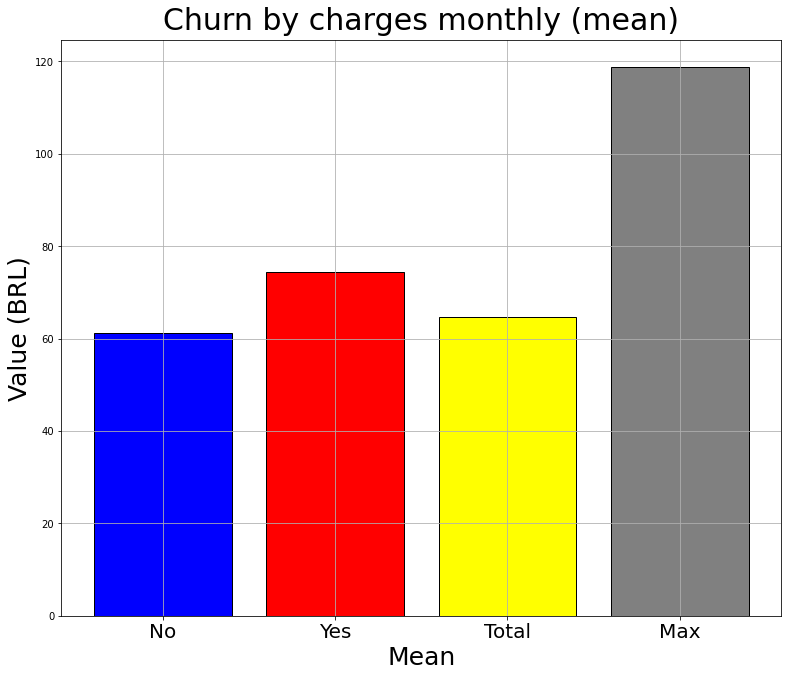

In [50]:
fig = plt.figure(figsize = (10,8)) # Creating an empty Matplotlib figure
axis = fig.add_axes([0, 0, 1, 1]) # Adding an empty axis onto which the graph will be plotted

data = [data_treated.query("churn == 'No'")["charges_monthly"].mean(), data_treated.query("churn == 'Yes'")["charges_monthly"].mean(), data_treated["charges_monthly"].mean(), data_treated["charges_monthly"].max()] # Creating a list of values from different data subsets: the mean value of monthly charges only for customers that haven't left the company, the mean value of monthly charges for customers that have left the company and the highest monthly charges value in the entire dataset.
index = range(len(data)) # Creating the index for the 'x' axis
xlabels = ["No", "Yes", "Total", "Max"] # Creating the labels for the 'x' axis

axis.grid(True) # Enabling the grid pattern
axis.bar(index, data, color = ["blue", "red", "yellow", "gray"], edgecolor = "black") # Plotting the bar chart
axis.set_title("Churn by charges monthly (mean)", fontsize = 30, pad = 10) # Setting the title
axis.set_xlabel("Mean", fontsize = 25) # Setting the label of the 'x' axis
axis.set_ylabel("Value (BRL)", fontsize = 25) # Setting the label of the 'y' axis

axis.set_xticks(index) # Setting the amount of values along the 'x' axis
axis.set_xticklabels(xlabels, fontsize = 20) # Setting the labels for the values along the 'x' axis

##### <font color = "Green"> A customer that has left the company has spent, on average, around 74,44 BRL monthly with the company's services, whereas customers ho haven't left spend around 61.27 BRL monthly.

#### <font color = "Blue"> 2. More information about the *churn* variable.


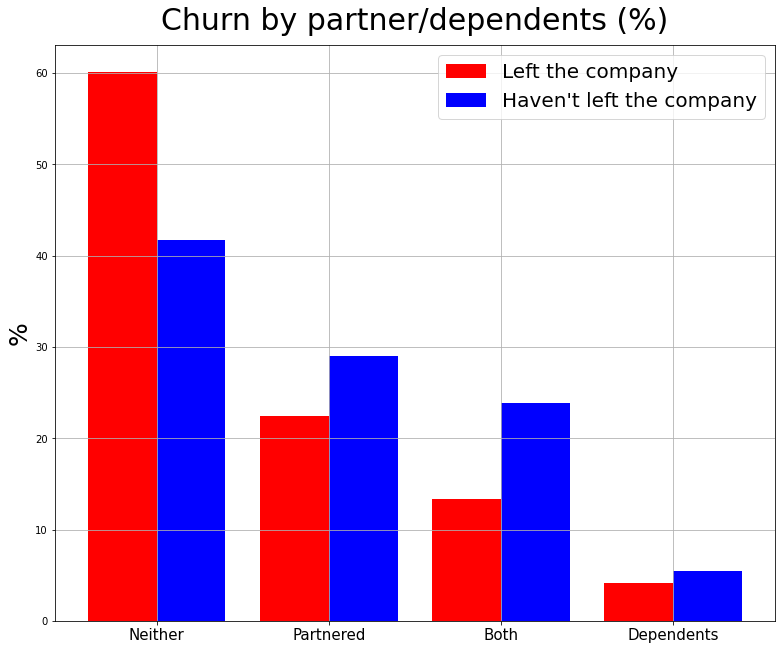

In [13]:
fig = plt.figure(figsize = (10, 8)) # Creating an empty Matplotlib figure
axis = fig.add_axes([0, 0, 1, 1]) # Adding an empty axis onto which the graph will be plotted

data = data_treated.query("churn == 'Yes'")[["partner", "dependents"]].value_counts(normalize = True) * 100 # Creating the first data subset, with the value counts of the 'partner' and 'dependent' columns for customers that have left the company
data2 = data_treated.query("churn == 'No'")[["partner", "dependents"]].value_counts(normalize = True) * 100 # Creating the second data subset, with the value counts of the 'partner' and 'dependent' columns for customers that haven't left the company

xlabels = ["Neither", "Partnered", "Both", "Dependents"] # Creating the labels for the 'x' axis
x_position = np.arange(len(data_treated.query("churn == 'Yes'")[["partner", "dependents"]].value_counts())) # Creating the index for the 'x' axis for data subset 1
x_position2 = np.arange(len(data_treated.query("churn == 'No'")[["partner", "dependents"]].value_counts())) # Creating the index for the 'x' axis for data subset 2
width = 0.4 # Establishing the width of the bars

axis.grid(True) # Enabling the grid pattern
axis.bar(x = x_position - width/2, height = data, data = data, width = 0.4, label = "Left the company", color = "red") # Plotting the first batch of bars onto the axis (the formula passed to the 'x' indicates that this set of bars will stand on the left)
axis.bar(x = x_position2 + width/2, height = data2, data = data2, width = 0.4, label = "Haven't left the company", color = "blue") # Plotting the second batch of bars onto the axis (the formula passed to the 'x' indicates that this set of bars will stand on the right)
axis.set_title("Partnered? / Has dependents? (%)", fontsize = 30, pad = 15) # Setting the title
axis.set_ylabel("%", fontsize = 25) # Setting the label of the 'y' axis
axis.set_xticks(x_position) # Setting the amount of values along the 'x' axis
axis.set_xticklabels(xlabels, fontsize = 15) # Setting the labels for the values along the 'x' axis
axis.legend(fontsize = 20) # Creating a legend

##### <font color = "Green"> A little more than 60% of customers who have left the company are neither partnered nor have dependents. This number is fairly different for customers who haven't left the company.

#### <font color = "Blue"> 3. Grouping the DataFrame by the *churn* variable.

##### Using the groupby() method, we can divide all entries of the DataFrame by the *churn* variable to draw further insight from integer or float data.

In [14]:
# Work in progress
data_by_churn = data_treated.groupby(by = "churn")

##### <font color = "Green"> The average tenure of customers who have left the company is a little below 18 months.

In [15]:
# Work in progress

data_by_churn[["charges_monthly", "charges_total"]].agg(func = ["min", "mean", "max"])

charges_monthly                    charges_total                      
                  min       mean     max           min         mean      max
churn                                                                       
No              18.25  61.265124  118.75          0.00  2549.911442  8672.45
Yes             18.85  74.441332  118.35         18.85  1531.796094  8684.80

##### <font color = "Green"> The customers who have left the company have spent, on average, around *74,44* with the company's services, which is around *13,00* more than the average customer who hasn't left the company.

In [16]:
# Work in progress

data_by_churn["services_hired"].agg(func = ["min", "mean", "max"])

,min,mean,max
churn,,,
No,1,4.173174,9
Yes,1,4.071696,9


##### <font color = "Green"> No obvious difference can be seen between the consumption habits of customers that have left and the ones that stayed with the company.

---
# Visualizing the distribution of the *churn* variable

---
# Applying other relevant visualization methods for the *churn* variable

---
# Analysing the correlation between the variables